In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apprentissage pour une fonction d'une variable réelle.

In [36]:
# fonction inconnue directement
L =  10

def objectif(x):
    return np.exp(- x / 10) * np.cos(np.pi * x)

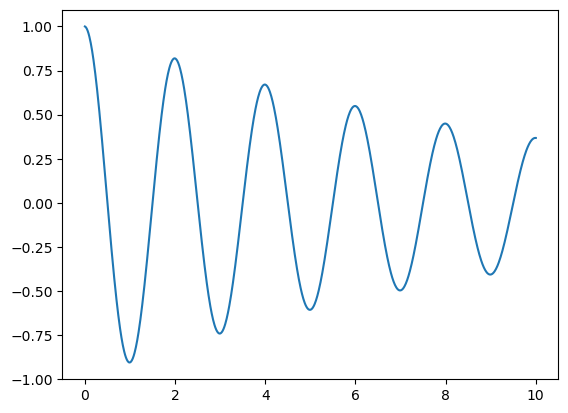

In [37]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys)

On n'a pas accès direct à la fonction `objectif` mais seulement à un échantillonnage bruité

In [38]:
# définition de l'échantillon
# prefixe s pour sample
sn = 20
bruit = 0.1
sx = np.linspace(0, L, sn)
sy = objectif(sx) + bruit * np.random.randn(sn)


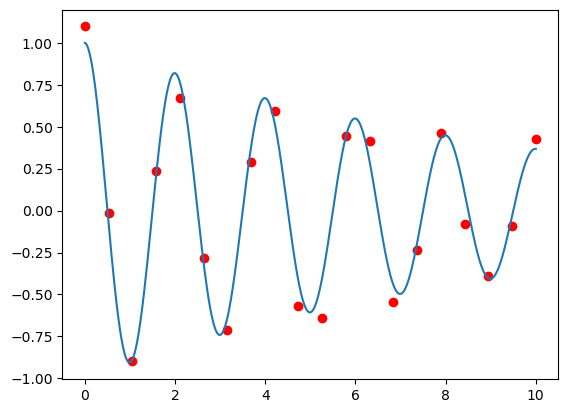

In [39]:
plt.plot(xs, ys)
plt.scatter(sx, sy, color="red")

**BUT** deviner la fonction `objectif` à partir de la seule connaissance de l'échantillon.

**PROBLEME** pas de sens mathématiques.

On va chercher dans une certaine classe de fonctions, celle qui ressemble le plus à `objectif` en faisant une mesure basée sur l'échantillon.

## Cas linéaire

On considère les fonction $(f_{a,b})_{(a,b)\in \mathbb{R}^2}$ définies par:
$$
\forall x \in \mathbb{R},\quad f_{a,b}(x) = a\, x + b.
$$

Etant donné un échantillon $(x_1,\ldots,x_n)$ et $(y_1,\ldots,y_n)$, l'erreur associée à une fonction $f_{a,b}$ est donnée ici par la formule
$$
\frac{1}{n}\sum_{i=1}^n \left( y_i - f_{a,b}(x_i) \right)^2.
$$


L'objectif est alors de déterminer la ou les fonctions minimisant cette erreur.

In [72]:
def erreur(coefs):
    a, b = coefs
    se = (sy - (a * sx + b)) ** 2
    return np.sum(se) / 2


In [73]:
resultat = minimize(fun=erreur, x0=np.array([0, 0]))

In [74]:
resultat

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7549250945666826
        x: [-1.621e-02  9.004e-02]
      nit: 4
      jac: [ 8.941e-08 -1.192e-07]
 hess_inv: [[ 5.429e-03 -2.714e-02]
            [-2.714e-02  1.857e-01]]
     nfev: 18
     njev: 6

In [43]:
print(f"erreur={resultat.fun}")
print(f"coefficients={resultat.x}")
a, b = resultat.x

erreur=5.509850189133385
coefficients=[-0.01620606  0.0900435 ]


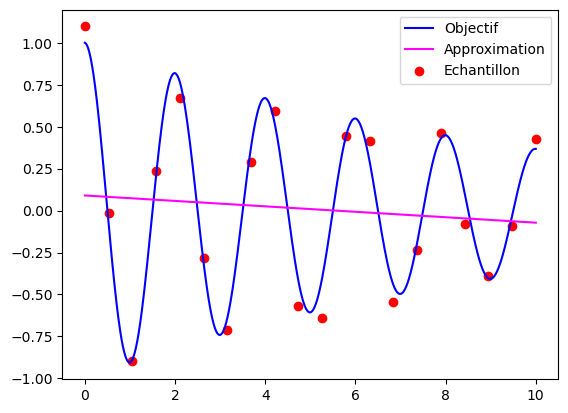

In [44]:
plt.plot(xs, ys, label="Objectif", color="blue")
plt.plot(xs, a * xs + b, label="Approximation", color="magenta")
plt.scatter(sx, sy, label="Echantillon", color="red")
plt.legend()

**Conclusion** on ne peut pas être content de l'approximation obtenue.

## Exercice

Coder la variante consistant pour un entier positif $d$ à regarder la meilleure approximation dans la famille des 
$(f_a)_{a\in \mathbb{R}^{d+1}}$ définie 
$$
\forall x \in \mathbb{R},\quad f_a(x) = \sum_{k=0}^d a_k x^k.
$$

In [75]:
# le degré d n'apparaît que implicitement comme la taille du tableau coefs moins 1
def erreur(coefs):
    es = (sum(c * sx ** k for (k, c) in enumerate(coefs)) - sy) ** 2
    return np.sum(es) / coefs.size

In [76]:
def apprentissage(d):
    resultat = minimize(fun=erreur, x0=np.zeros(shape=(d + 1,)))
    if resultat.success is False:
        raise ValueError("Impossible d'entrainer le modèle!")
    print(f"erreur={resultat.fun}")
    print(f"coefficients={resultat.x}")
    plt.plot(xs, ys, label="Objectif", color="blue")
    plt.plot(xs, sum(c * xs ** k for (k, c) in enumerate(resultat.x)), label="Approximation", color="magenta")
    plt.scatter(sx, sy, label="Echantillon", color="red")
    plt.legend()

In [77]:
apprentissage(d=3)

ValueError: Impossible d'entrainer le modèle!

In [78]:
apprentissage(d=5)

ValueError: Impossible d'entrainer le modèle!

In [79]:
apprentissage(d=10)

ValueError: Impossible d'entrainer le modèle!

**PROBLEME** le solveur n'arrive pas à converger.
En fait $x$ varie de $0$ à $L=10$, donc en prenant les puissances successives la sensibilité des coefficients est très différente suivant la puissance utilisée.
La famille des polynômes est très mal adaptée à cette approche.

## Exercice

Utiliser plutôt la famille $(f_a)_{a\in \mathbb{R}^{d+1}}$ définie 
$$
\forall x \in \mathbb{R},\quad f_a(x) = \sum_{k=0}^d a_k \cos(k\, x).
$$

In [85]:
def erreur_cos(coefs):
    es = (sum(c * np.cos(k * sx) for (k, c) in enumerate(coefs)) - sy) ** 2
    return np.sum(es) / sx.size

In [86]:
def apprentissage_cos(d):
    resultat = minimize(fun=erreur_cos, x0=np.zeros(shape=(d + 1,)))
    if resultat.success is False:
        raise ValueError("Impossible d'entrainer le modèle!")
    print(f"erreur={resultat.fun}")
    print(f"coefficients={resultat.x}")
    plt.plot(xs, ys, label="Objectif", color="blue")
    plt.plot(xs, sum(c * np.cos(k * xs) for (k, c) in enumerate(resultat.x)), label="Approximation", color="magenta")
    plt.scatter(sx, sy, label="Echantillon", color="red")
    plt.legend()

erreur=0.11724499407002772
coefficients=[0.00179962 0.02061309 0.07701413 0.5589672 ]


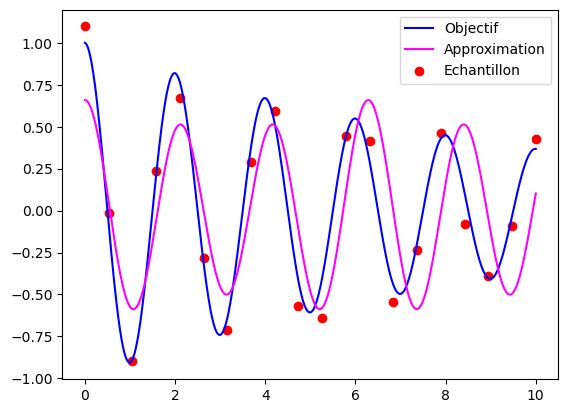

In [87]:
apprentissage_cos(d=3)

erreur=0.044782993278912844
coefficients=[-0.00230911  0.00321136 -0.18520573  1.48524886  0.57868723 -0.19336489
  0.02479578  0.19628549 -0.52963896 -0.93742322  0.30415589]


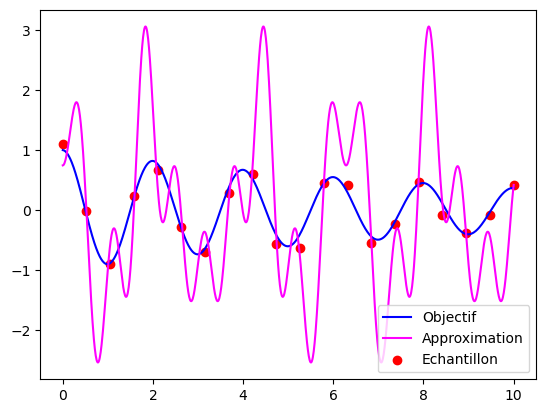

In [88]:
apprentissage_cos(d=10)

erreur=1.3435568006299317e-07
coefficients=[-0.7279495  -0.82603411  0.20565614 -3.9406834   3.40681538 -2.39149568
  0.22428595  2.3289834  -4.54094297  1.75955069 -0.02376178  0.5109895
  0.73108836  0.38191723 -0.13025523  3.03421261 -0.72085134  0.80354073
 -0.24379959 -0.72021809  1.97612435]


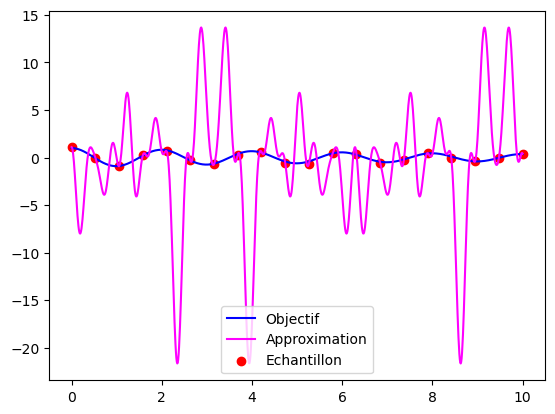

In [89]:
apprentissage_cos(d=20)

**CONCLUSION** on passe bien par tous les points de l'échantillon mais on ne ressemble pas du tout à la courbe d'`objectif`.

## Exercice

Tracer l'évolution de l'erreur par rapport au paramètre $d$.
Et sur le même graphe regarder l'évolution l'erreur quadratique entre la fonction objectif et son approximation mais en utilisant les points $xs$ plutôt que l'échantillon.

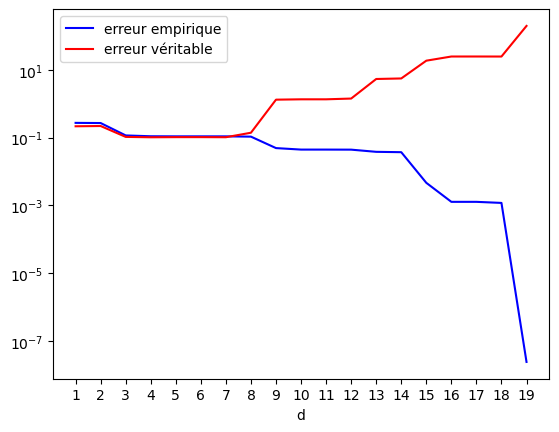

In [92]:
ds = range(1, 20)
erreurs_echantillon = list()
erreurs_objectives = list()
for d in ds:
    resultat = minimize(fun=erreur_cos, x0=np.zeros(shape=(d + 1,)))
    erreurs_echantillon.append(resultat.fun)
    es = (sum(c * np.cos(k * xs) for (k, c) in enumerate(resultat.x)) - ys) ** 2
    erreurs_objectives.append(np.sum(es) / xs.size)
    
plt.xlabel("d")
plt.xticks(ds)
plt.semilogy(ds, erreurs_echantillon, label="erreur empirique", color="blue")
plt.semilogy(ds, erreurs_objectives, label="erreur véritable", color="red")
plt.legend()

**ANALYSE** au début augmenter le nombre de paramètres permet effectivement de mieux approximer la fonction cachée.
Mais au bout d'un certain degré de complexité, on a un décrochage entre ce qu'on peut mesure par l'échantillon et ce qui se cache derrière.
On appelle  cela le **surapprentissage**.

## Exercice

Reprendre le graphique précédent avec d'autres tailles d'échantillons, pour un degré fixé de complexité du modèle.

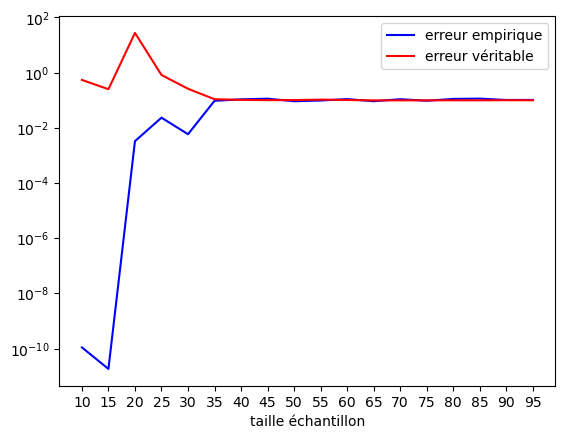

In [94]:
d = 15
sns = range(10, 100, 5)
erreurs_echantillon = list()
erreurs_objectives = list()
for sn in sns:
    bruit = 0.1
    sx = np.linspace(0, L, sn)
    sy = objectif(sx) + bruit * np.random.randn(sn)
    def erreur_cos(coefs):
        es = (sum(c * np.cos(k * sx) for (k, c) in enumerate(coefs)) - sy) ** 2
        return np.sum(es) / sx.size
    resultat = minimize(fun=erreur_cos, x0=np.zeros(shape=(d + 1,)))
    erreurs_echantillon.append(resultat.fun)
    
    es = (sum(c * np.cos(k * xs) for (k, c) in enumerate(resultat.x)) - ys) ** 2
    erreurs_objectives.append(np.sum(es) / xs.size)
    

plt.xlabel("taille échantillon")
plt.xticks(sns)
plt.semilogy(sns, erreurs_echantillon, label="erreur empirique", color="blue")
plt.semilogy(sns, erreurs_objectives, label="erreur véritable", color="red")
plt.legend()

**CONCLUSION** on voit qu'on commence en situation de surapprentissage, mais qu'au fur et à mesure que la taille de l'échantillon augmente, on bascule hors de ce régime.

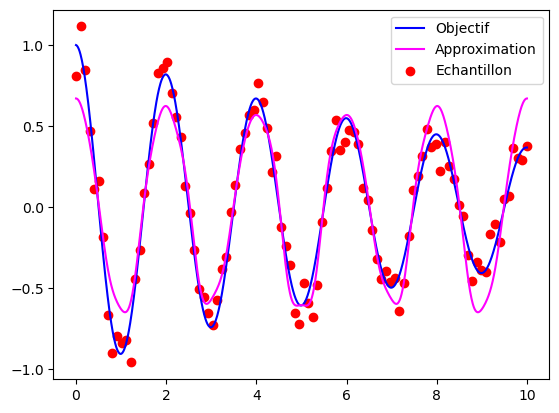

In [97]:
d = 20
sn = 100
bruit = 0.1
sx = np.linspace(0, L, sn)
sy = objectif(sx) + bruit * np.random.randn(sn)
def erreur_cos(coefs):
    es = (sum(c * np.cos(k * sx * 2 * np.pi / L) for (k, c) in enumerate(coefs)) - sy) ** 2
    return np.sum(es) / sx.size
resultat = minimize(fun=erreur_cos, x0=np.zeros(shape=(d + 1,)))

plt.plot(xs, ys, label="Objectif", color="blue")
plt.plot(xs, sum(c * np.cos(k * xs * 2 * np.pi / L) for (k, c) in enumerate(resultat.x)), label="Approximation", color="magenta")
plt.scatter(sx, sy, label="Echantillon", color="red")
plt.legend()

**CONCLUSION** on voit que si on a suffisamment de données on peut avoir un modèle complexe sans être en surapprentissage.

**PERSPECTIVE** il faut par contre arriver à éviter le surapprentissage en utilisant que l'échantillon!

**SOLUTION** on va séparer l'échantillon en deux, une partie servira à l'optimisation (i.e. l'apprentissage) et l'autre servira à produire une erreur *objective*. Si les deux sont en désaccord, on est en surapprentissage et le modèle ne **DOIT EN AUCUN CAS** être utilisé.